<h1><center>ENEM
<hr>

In [1]:
from platform import system

if system() == 'Linux':
    import cudf

import pandas as pd

In [2]:
if system() == 'Linux':

    def calcula_missing(df) -> cudf.DataFrame:

        mask_nulos = (df.isnull().sum() > 0).to_pandas()

        cols_missing = df.columns[mask_nulos]

        if len(cols_missing) > 0:

            cols_missing = (100 * df[cols_missing].isnull().sum() / df.shape[0])

            cols_missing = cols_missing.sort_values(ascending = False).reset_index()

            cols_missing.rename(columns = {0: '%_nulos', 'index': 'variavel'}, inplace = True)

            print("=" * 50)
            print()

            print("Percentual de valores ausentes por variável\n")

            print(cols_missing)

            print()
            print("=" * 50)

        else:
            print(f"Não há valores ausentes.")

        del mask_nulos

        return cols_missing
    
else:

        def calcula_missing(df) -> pd.DataFrame:

            mask_nulos = df.isnull().sum() > 0

            cols_missing = df.columns[mask_nulos]

            if len(cols_missing) > 0:

                cols_missing = (100 * df[cols_missing].isnull().sum() / df.shape[0])

                cols_missing = cols_missing.sort_values(ascending = False).reset_index()

                cols_missing.rename(columns = {0: '%_nulos', 'index': 'variavel'}, inplace = True)

                print("=" * 50)
                print()

                print("Percentual de valores ausentes por variável\n")

                print(cols_missing)

                print()
                print("=" * 50)

            else:
                print(f"Não há valores ausentes.")

            del mask_nulos

            return cols_missing

<h2><center>Importação dos Dados
<hr>

In [3]:
df_enem_2022 = pd.read_csv(
        'dados/MICRODADOS_ENEM_2022.csv',
        sep = ';',
        encoding = 'latin1'
)

df_enem_2023 = pd.read_csv(
        'dados/MICRODADOS_ENEM_2023.csv',
        sep = ';',
        encoding = 'latin1'
)

if system() == 'Linux':
    df_enem_2022 = cudf.from_pandas(df_enem_2022)
    df_enem_2023 = cudf.from_pandas(df_enem_2023)


if system() == 'Linux':
    df_enem = cudf.concat([df_enem_2022, df_enem_2023], ignore_index = True).reset_index(drop = True)

else:
    df_enem = pd.concat([df_enem_2022, df_enem_2023], ignore_index = True).reset_index(drop = True)

print(f"ENEM 2022 tem {df_enem_2022.shape[0] :,} linhas e {df_enem_2022.shape[1] :,} colunas.")
print(f"ENEM 2023 tem {df_enem_2023.shape[0] :,} linhas e {df_enem_2023.shape[1] :,} colunas.")
print(f"ENEM final tem {df_enem.shape[0] :,} linhas e {df_enem.shape[1] :,} colunas.")

del df_enem_2022, df_enem_2023

ENEM 2022 tem 3,476,105 linhas e 76 colunas.
ENEM 2023 tem 3,933,955 linhas e 76 colunas.
ENEM final tem 7,410,060 linhas e 76 colunas.


<h2><center>Renomeando
<hr>

In [4]:
df_enem.rename(columns = {
    'NU_INSCRICAO'              : 'num_inscricao',
    'NU_ANO'                    : 'edicao',
    'TP_FAIXA_ETARIA'           : 'fx_etaria',
    'TP_SEXO'                   : 'sexo',
    'TP_ESTADO_CIVIL'           : 'estado_civil',
    'TP_COR_RACA'               : 'cor_raca',
    'TP_NACIONALIDADE'          : 'nacionalidade',
    'TP_ST_CONCLUSAO'           : 'conclusao_ensino_medio',
    'TP_ANO_CONCLUIU'           : 'ano_conclusao_ensino_medio',
    'TP_ESCOLA'                 : 'tp_escola',
    'TP_ENSINO'                 : 'tp_ensino',
    'IN_TREINEIRO'              : 'flag_treineiro',
    'CO_MUNICIPIO_ESC'          : 'cod_municipio_escola',
    'NO_MUNICIPIO_ESC'          : 'nome_municipio_escola',
    'CO_UF_ESC'                 : 'cod_uf_escola',
    'SG_UF_ESC'                 : 'sigla_uf_escola',
    'TP_DEPENDENCIA_ADM_ESC'    : 'tp_adm_escola',
    'TP_LOCALIZACAO_ESC'        : 'tp_local_escola',
    'TP_SIT_FUNC_ESC'           : 'funcionamento_escola',
    'CO_MUNICIPIO_PROVA'        : 'cod_municipio_prova',
    'NO_MUNICIPIO_PROVA'        : 'nome_municipio_prova',
    'CO_UF_PROVA'               : 'cod_uf_prova',
    'SG_UF_PROVA'               : 'sigla_uf_prova',
    'TP_PRESENCA_CN'            : 'presenca_ciencias_natureza',
    'TP_PRESENCA_CH'            : 'presenca_ciencias_humanas',
    'TP_PRESENCA_LC'            : 'presenca_linguagem_codigos',
    'TP_PRESENCA_MT'            : 'presenca_matematica',
    'CO_PROVA_CN'               : 'cod_prova_ciencias_natureza',
    'CO_PROVA_CH'               : 'cod_prova_ciencias_humanas',
    'CO_PROVA_LC'               : 'cod_prova_linguagem_codigos',
    'CO_PROVA_MT'               : 'cod_prova_matematica',
    'NU_NOTA_CN'                : 'nota_ciencias_natureza',
    'NU_NOTA_CH'                : 'nota_ciencias_humanas',
    'NU_NOTA_LC'                : 'nota_linguagem_codigos',
    'NU_NOTA_MT'                : 'nota_matematica',
    'TX_RESPOSTAS_CN'           : 'respostas_ciencias_natureza',
    'TX_RESPOSTAS_CH'           : 'respostas_ciencias_humanas',
    'TX_RESPOSTAS_LC'           : 'respostas_linguagem_codigos',
    'TX_RESPOSTAS_MT'           : 'respostas_matematica',
    'TP_LINGUA'                 : 'lingua_estrangeira',
    'TX_GABARITO_CN'            : 'gabarito_ciencias_natureza',
    'TX_GABARITO_CH'            : 'gabarito_ciencias_humanas',
    'TX_GABARITO_LC'            : 'gabarito_linguagem_codigos',
    'TX_GABARITO_MT'            : 'gabarito_matematica',
    'TP_STATUS_REDACAO'         : 'status_redacao',
    'NU_NOTA_COMP1'             : 'nota_redacao_competencia_1',
    'NU_NOTA_COMP2'             : 'nota_redacao_competencia_2',
    'NU_NOTA_COMP3'             : 'nota_redacao_competencia_3',
    'NU_NOTA_COMP4'             : 'nota_redacao_competencia_4',
    'NU_NOTA_COMP5'             : 'nota_redacao_competencia_5',
    'NU_NOTA_REDACAO'           : 'nota_redacao',
    'Q001'                      : '01_escolaridade_pai',
    'Q002'                      : '02_escolaridade_mae',
    'Q003'                      : '03_ocupacao_pai',
    'Q004'                      : '04_ocupacao_mae',
    'Q005'                      : '05_qtde_moradores',
    'Q006'                      : '06_renda_familiar',
    'Q007'                      : '07_qtde_trabalhador_domestico',
    'Q008'                      : '08_qtde_banheiro',
    'Q009'                      : '09_qtde_quarto',
    'Q010'                      : '10_qtde_carro',
    'Q011'                      : '11_qtde_motocicleta',
    'Q012'                      : '12_qtde_geladeira',
    'Q013'                      : '13_qtde_freezer',
    'Q014'                      : '14_qtde_maq_lavar_roupa',
    'Q015'                      : '15_qtde_maq_secar_roupa',
    'Q016'                      : '16_qtde_micro_ondas',
    'Q017'                      : '17_qtde_maq_lavar_louca',
    'Q018'                      : '18_flag_aspirador_po',
    'Q019'                      : '19_qtde_tv',
    'Q020'                      : '20_flag_aparelho_dvd',
    'Q021'                      : '21_flag_tv_assinatura',
    'Q022'                      : '22_qtde_celular',
    'Q023'                      : '23_flag_telefone_fixo',
    'Q024'                      : '24_qtde_computadores',
    'Q025'                      : '25_flag_internet'
}, inplace = True)

,num_inscricao,edicao,fx_etaria,sexo,estado_civil,cor_raca,nacionalidade,conclusao_ensino_medio,ano_conclusao_ensino_medio,tp_escola,...,16_qtde_micro_ondas,17_qtde_maq_lavar_louca,18_flag_aspirador_po,19_qtde_tv,20_flag_aparelho_dvd,21_flag_tv_assinatura,22_qtde_celular,23_flag_telefone_fixo,24_qtde_computadores,25_flag_internet
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410055,210061959676,2023,12,M,1,1,1,1,6,1,...,B,A,A,C,A,B,E,A,A,B
7410056,210061950911,2023,1,F,1,1,2,3,0,1,...,B,A,B,C,B,B,B,B,C,B
7410057,210061965966,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
7410058,210061932304,2023,2,M,1,1,1,2,0,3,...,B,B,B,C,A,A,D,A,C,B


<h2><center>Retirando variáveis que não vão ser usadas
<hr>

In [5]:
df_enem.drop(columns =
    [
        'num_inscricao',
        'nota_redacao_competencia_1',
        'nota_redacao_competencia_2',
        'nota_redacao_competencia_3',
        'nota_redacao_competencia_4',
        'nota_redacao_competencia_5',
        'gabarito_ciencias_natureza',
        'gabarito_ciencias_humanas',
        'gabarito_linguagem_codigos',
        'gabarito_matematica',
        'respostas_ciencias_natureza',
        'respostas_ciencias_humanas',
        'respostas_linguagem_codigos',
        'respostas_matematica',
        'cod_prova_ciencias_natureza',
        'cod_prova_ciencias_humanas',
        'cod_prova_linguagem_codigos',
        'cod_prova_matematica',
        'cod_municipio_prova',
        'nome_municipio_prova',
        'cod_uf_prova',
        'sigla_uf_prova'
    ],
    inplace = True
)

<h2><center>Ajuste nos valores das variáveis
<hr>

In [6]:
### Presença

dc_presenca = {
    0: 'Falta',
    1: 'Presente',
    2: 'Eliminado'
}

df_enem['presenca_ciencias_humanas'] = df_enem['presenca_ciencias_humanas'].map(dc_presenca)
df_enem['presenca_ciencias_natureza'] = df_enem['presenca_ciencias_natureza'].map(dc_presenca)
df_enem['presenca_linguagem_codigos'] = df_enem['presenca_linguagem_codigos'].map(dc_presenca)
df_enem['presenca_matematica'] = df_enem['presenca_matematica'].map(dc_presenca)

del dc_presenca

In [7]:
### Status Redação

dc_status_redacao = {
    1:	'sem_problemas',
    2:	'anulada',
    3:	'copia_texto_motivador',
    4:	'em_branco',
    6:	'fuga_ao_tema',
    7:	'nao_atendimento_ao_tipo_textual',
    8:	'texto_insuficiente',
    9:	'parte_desconectada',
    None: 'nulo'
}

df_enem['status_redacao'] = df_enem['status_redacao'].map(dc_status_redacao)

del dc_status_redacao

In [8]:
## Algumas variáveis possuem uma categoria que representa ausência de informação
## Vamos mapear essas categorias para valores nulos

In [9]:
### Estado Civil

dc_estado_civil = {
    0: None,
    1: 'solteiro',
    2: 'casado',
    3: 'separado',
    4: 'viuvo'
}

df_enem['estado_civil'] = df_enem['estado_civil'].map(dc_estado_civil)

del dc_estado_civil

In [10]:
### Cor/Raça

dc_cor_raca = {
    0: None,
    1: 'branca',
    2: 'preta',
    3: 'parda',
    4: 'amarela',
    5: 'indigena',
    6: None
}

df_enem['cor_raca'] = df_enem['cor_raca'].map(dc_cor_raca)

del dc_cor_raca

In [11]:
### Nacionalidade

dc_nacionalidade = {
    0: None,
    1: 'brasileiro',
    2: 'naturalizado',
    3: 'estrangeiro',
    4: 'brasileiro_nascido_exterior'
}

df_enem['nacionalidade'] = df_enem['nacionalidade'].map(dc_nacionalidade)

del dc_nacionalidade

In [12]:
### Tipo de Escola

dc_tp_escola = {
    1: None,
    2: 'Pública',
    3: 'Privada'
}

df_enem['tp_escola'] = df_enem['tp_escola'].map(dc_tp_escola)

del dc_tp_escola

In [13]:
### Escolaridade dos Pai e da Mãe

dc_escolaridade = {
    'A': 'A',
    'B': 'B',
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': 'F',
    'G': 'G',
    'H': None
}

df_enem['01_escolaridade_pai'] = df_enem['01_escolaridade_pai'].map(dc_escolaridade)
df_enem['02_escolaridade_mae'] = df_enem['02_escolaridade_mae'].map(dc_escolaridade)

del dc_escolaridade

In [14]:
### Ocupação dos Pai e da Mãe

dc_ocupacao = {
    'A': 'A',
    'B': 'B',
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': None
}

df_enem['03_ocupacao_pai'] = df_enem['03_ocupacao_pai'].map(dc_ocupacao)
df_enem['04_ocupacao_mae'] = df_enem['04_ocupacao_mae'].map(dc_ocupacao)

del dc_ocupacao

In [15]:
### Língua Estrangeira

dc_lingua_estrangeira = {
    0: 'ingles',
    1: 'espanhol'
}

df_enem['lingua_estrangeira'] = df_enem['lingua_estrangeira'].map(dc_lingua_estrangeira)

del dc_lingua_estrangeira

In [16]:
### Tipo de Ensino

dc_tp_ensino = {
    1: 'regular',
    2: 'especial'
}

df_enem['tp_ensino'] = df_enem['tp_ensino'].map(dc_tp_ensino)

del dc_tp_ensino

In [17]:
### Faixa Etária

dc_fx_etaria = {
    1: 'A',
    2: 'B',
    3: 'C',
    4: 'D',
    5: 'E',
    6: 'F',
    7: 'G',
    8: 'H',
    9: 'I',
    10: 'J',
    11: 'K',
    12: 'L',
    13: 'M',
    14: 'N',
    15: 'O',
    16: 'P',
    17: 'Q',
    18: 'R',
    19: 'S',
    20: 'T'
}

df_enem['fx_etaria'] = df_enem['fx_etaria'].map(dc_fx_etaria)

del dc_fx_etaria

<h2><center>Análise dos valores nulos
<hr>

In [18]:
cols_missing = calcula_missing(df_enem)


Percentual de valores ausentes por variável

                  variavel    %_nulos
0     cod_municipio_escola  74.218157
1    nome_municipio_escola  74.218157
2            cod_uf_escola  74.218157
3          sigla_uf_escola  74.218157
4            tp_adm_escola  74.218157
5          tp_local_escola  74.218157
6     funcionamento_escola  74.218157
7                tp_ensino  64.887936
8                tp_escola  63.310432
9   nota_ciencias_natureza  31.878797
10         nota_matematica  31.878797
11   nota_ciencias_humanas  28.258543
12  nota_linguagem_codigos  28.258543
13            nota_redacao  28.258543
14         03_ocupacao_pai  12.499372
15     01_escolaridade_pai   9.946950
16         04_ocupacao_mae   8.854625
17            estado_civil   4.053854
18     02_escolaridade_mae   3.264616
19                cor_raca   1.584899
20           nacionalidade   0.050863



In [19]:
### Irei retirar as colunas com missing maior que 50%

if system() == 'Linux':
    cols_drop = cols_missing[cols_missing['%_nulos'] > 50]['variavel'].to_pandas().to_list()
    cols_missing = cols_missing[cols_missing['%_nulos'] <= 50]

else:
    cols_drop = cols_missing[cols_missing['%_nulos'] > 50]['variavel'].to_list()
    cols_missing = cols_missing[cols_missing['%_nulos'] <= 50]

df_enem.drop(columns = cols_drop, inplace = True)

print("=" * 50)
print()

print("Percentual de valores ausentes por variável\n")

print(cols_missing)

print()
print("=" * 50)

del cols_drop


Percentual de valores ausentes por variável

                  variavel    %_nulos
9   nota_ciencias_natureza  31.878797
10         nota_matematica  31.878797
11   nota_ciencias_humanas  28.258543
12  nota_linguagem_codigos  28.258543
13            nota_redacao  28.258543
14         03_ocupacao_pai  12.499372
15     01_escolaridade_pai   9.946950
16         04_ocupacao_mae   8.854625
17            estado_civil   4.053854
18     02_escolaridade_mae   3.264616
19                cor_raca   1.584899
20           nacionalidade   0.050863



In [20]:
### Irei analisar a relação do missing nas notas com a presença nas provas
### No caso da redação, irei analisar o status da redação e a presença na prova de Linguagens e Códigos, que é quando a redação é aplicada

dc_analise_missing = {
    'nota_ciencias_natureza' : ['presenca_ciencias_natureza'],
    'nota_ciencias_humanas' : ['presenca_ciencias_humanas'],
    'nota_linguagem_codigos' : ['presenca_linguagem_codigos'],
    'nota_matematica' : ['presenca_matematica'],
    'nota_redacao' : ['presenca_linguagem_codigos', 'status_redacao']
}

print("=" * 50)

if system() == 'Linux':
    df_notas = cudf.DataFrame()
else:
    df_notas = pd.DataFrame()

for nota, colunas in dc_analise_missing.items():

    print(f"\nAnálise de missing para a variável {nota}\n")

    tipo_col = 'tipo_' + nota

    grp_cols = list(colunas) + [tipo_col]

    df_enem[tipo_col] = 'Com nota'

    df_enem.loc[df_enem[nota].isnull(), tipo_col] = 'Nulo'

    df_enem.loc[df_enem[nota] == 0, tipo_col] = 'Zero'

    df_temp = df_enem.groupby(grp_cols).size().reset_index(name = 'quantidade')

    if system() == 'Linux':
        df_notas = cudf.concat([df_notas, df_temp], ignore_index = True)
    else:
        df_notas = pd.concat([df_notas, df_temp], ignore_index = True)

    print(df_temp)

    print(df_temp['quantidade'].sum(), df_enem.shape[0])

    print("\n" + "=" * 50)

print()

df_notas.to_csv('relatorios_missing.csv', index = False)

df_enem.drop(columns = [
    'tipo_nota_ciencias_natureza',
    'tipo_nota_ciencias_humanas',
    'tipo_nota_linguagem_codigos',
    'tipo_nota_matematica',
    'tipo_nota_redacao'
], inplace = True)

del tipo_col, grp_cols, nota, colunas, df_temp, dc_analise_missing, df_notas


Análise de missing para a variável nota_ciencias_natureza

  presenca_ciencias_natureza tipo_nota_ciencias_natureza  quantidade
0                   Presente                        Zero       17061
1                      Falta                        Nulo     2358449
2                  Eliminado                        Nulo        3789
3                   Presente                    Com nota     5030761
7410060 7410060


Análise de missing para a variável nota_ciencias_humanas

  presenca_ciencias_humanas tipo_nota_ciencias_humanas  quantidade
0                  Presente                       Zero       10085
1                     Falta                       Nulo     2084695
2                 Eliminado                       Nulo        9280
3                  Presente                   Com nota     5306000
7410060 7410060


Análise de missing para a variável nota_linguagem_codigos

  presenca_linguagem_codigos tipo_nota_linguagem_codigos  quantidade
0                   Presente          

In [21]:
### Para as 5 notas, as notas nulas estão relacionadoas a participantes que faltaram ou foram eliminados.
### Os alunos presentes podem possuir nota zero.

### Na redação, as notas zeradas dos alunos presentes são relacionadas ao status da redação
### Porém, é possível fazer o filtro apenas com a nota zerada e a presença na prova de Linguagens e Códigos

In [22]:
cols_missing = cols_missing[~cols_missing['variavel'].isin([
    'nota_ciencias_natureza',
    'nota_ciencias_humanas',
    'nota_linguagem_codigos',
    'nota_matematica',
    'nota_redacao',
    'status_redacao'
])].reset_index(drop = True)

print(cols_missing)

              variavel    %_nulos
0      03_ocupacao_pai  12.499372
1  01_escolaridade_pai   9.946950
2      04_ocupacao_mae   8.854625
3         estado_civil   4.053854
4  02_escolaridade_mae   3.264616
5             cor_raca   1.584899
6        nacionalidade   0.050863


In [23]:
if system() == 'Linux':
    cols_missing = cols_missing['variavel'].to_pandas().to_list()
else:
    cols_missing = cols_missing['variavel'].to_list()

df_enem['flag_missing'] = df_enem[cols_missing].isnull().any(axis = 1).astype('bool')

print(f"Consolidando as colunas de baixo missing, temos {df_enem['flag_missing'].sum() / df_enem.shape[0]:.2%} linhas com algum valor missing.")

Consolidando as colunas de baixo missing, temos 26.37% linhas com algum valor missing.


In [24]:
### Irei retirar as linhas com algum valor missing nas colunas restantes

df_enem = df_enem[~df_enem['flag_missing']].reset_index(drop = True)

df_enem.drop(columns = cols_missing, inplace = True)
df_enem.drop(columns = ['flag_missing'], inplace = True)

In [25]:
cols_missing = calcula_missing(df_enem)


Percentual de valores ausentes por variável

                 variavel    %_nulos
0  nota_ciencias_natureza  30.374791
1         nota_matematica  30.374791
2   nota_ciencias_humanas  26.933752
3  nota_linguagem_codigos  26.933752
4            nota_redacao  26.933752



In [26]:
### Sobraram apenas valores faltantes nas notas, que são as variáveis respostas

del cols_missing

<h2><center>Separando os conjuntos de dados
<hr>

In [27]:
### Ciências Humanas

df_ciencia_humanas = df_enem[
    (df_enem['presenca_ciencias_humanas'] == 'Presente') &
    (df_enem['nota_ciencias_humanas'] != 0)
].copy()

df_ciencia_humanas.drop(columns =
    [
        'presenca_ciencias_humanas',
        'presenca_ciencias_natureza',
        'presenca_linguagem_codigos',
        'presenca_matematica',
        'status_redacao',
        'nota_ciencias_natureza',
        'nota_linguagem_codigos',
        'nota_matematica',
        'nota_redacao'
    ],
    inplace = True
)

preditoras_humanas = df_ciencia_humanas.columns.tolist()
preditoras_humanas.remove('nota_ciencias_humanas')
target_humanas = ['nota_ciencias_humanas']

df_ciencia_humanas = df_ciencia_humanas[preditoras_humanas + target_humanas].reset_index(drop = True)

print(f"A base com os dados de Ciências Humanas tem {df_ciencia_humanas.shape[0] :,} linhas e {df_ciencia_humanas.shape[1] :,} colunas.")

cols_missing_humanas = calcula_missing(df_ciencia_humanas)

A base com os dados de Ciências Humanas tem 3,979,204 linhas e 29 colunas.
Não há valores ausentes.


In [28]:
### Ciências Natureza

df_ciencia_natureza = df_enem[
    (df_enem['presenca_ciencias_natureza'] == 'Presente') &
    (df_enem['nota_ciencias_natureza'] != 0)
].copy()

df_ciencia_natureza.drop(columns =
    [
        'presenca_ciencias_humanas',
        'presenca_ciencias_natureza',
        'presenca_linguagem_codigos',
        'presenca_matematica',
        'status_redacao',
        'nota_ciencias_humanas',
        'nota_linguagem_codigos',
        'nota_matematica',
        'nota_redacao'
    ],
    inplace = True
)

preditoras_natureza = df_ciencia_natureza.columns.tolist()
preditoras_natureza.remove('nota_ciencias_natureza')
target_natureza = ['nota_ciencias_natureza']

df_ciencia_natureza = df_ciencia_natureza[preditoras_natureza + target_natureza].reset_index(drop = True)

print(f"A base com os dados de Ciências Natureza tem {df_ciencia_natureza.shape[0] :,} linhas e {df_ciencia_natureza.shape[1] :,} colunas.")

cols_missing_natureza = calcula_missing(df_ciencia_natureza)

A base com os dados de Ciências Natureza tem 3,786,766 linhas e 29 colunas.
Não há valores ausentes.


In [29]:
### Linguagem e Código

df_linguagem_codigos = df_enem[
    (df_enem['presenca_linguagem_codigos'] == 'Presente') &
    (df_enem['nota_linguagem_codigos'] != 0)
].copy()

df_linguagem_codigos.drop(columns =
    [
        'presenca_ciencias_humanas',
        'presenca_ciencias_natureza',
        'presenca_linguagem_codigos',
        'presenca_matematica',
        'status_redacao',
        'nota_ciencias_humanas',
        'nota_ciencias_natureza',
        'nota_matematica',
        'nota_redacao'
    ],
    inplace = True
)

preditoras_linguagem = df_linguagem_codigos.columns.tolist()
preditoras_linguagem.remove('nota_linguagem_codigos')
target_linguagem = ['nota_linguagem_codigos']

df_linguagem_codigos = df_linguagem_codigos[preditoras_linguagem + target_linguagem].reset_index(drop = True)

print(f"A base com os dados de Linguagem e Códigos tem {df_linguagem_codigos.shape[0] :,} linhas e {df_linguagem_codigos.shape[1] :,} colunas.")

cols_missing_linguagem = calcula_missing(df_linguagem_codigos)

A base com os dados de Linguagem e Códigos tem 3,983,577 linhas e 29 colunas.
Não há valores ausentes.


In [30]:
### Matemática

df_matematica = df_enem[
    (df_enem['presenca_matematica'] == 'Presente') &
    (df_enem['nota_matematica'] != 0)
].copy()

df_matematica.drop(columns =
    [
        'presenca_ciencias_humanas',
        'presenca_ciencias_natureza',
        'presenca_linguagem_codigos',
        'presenca_matematica',
        'status_redacao',
        'nota_ciencias_humanas',
        'nota_ciencias_natureza',
        'nota_linguagem_codigos',
        'nota_redacao'
    ],
    inplace = True
)

preditoras_matematica = df_matematica.columns.tolist()
preditoras_matematica.remove('nota_matematica')
target_matematica = ['nota_matematica']

df_matematica = df_matematica[preditoras_matematica + target_matematica].reset_index(drop = True)

print(f"A base com os dados de Matemática tem {df_matematica.shape[0] :,} linhas e {df_matematica.shape[1] :,} colunas.")

cols_missing_matematica = calcula_missing(df_matematica)

A base com os dados de Matemática tem 3,786,703 linhas e 29 colunas.
Não há valores ausentes.


In [31]:
### Redação

df_redacao = df_enem[
    (df_enem['presenca_linguagem_codigos'] == 'Presente') &
    (df_enem['status_redacao'] == 'sem_problemas') &
    (df_enem['nota_redacao'] != 0)
].copy()

df_redacao.drop(columns =
    [
        'presenca_ciencias_humanas',
        'presenca_ciencias_natureza',
        'presenca_linguagem_codigos',
        'presenca_matematica',
        'status_redacao',
        'nota_ciencias_humanas',
        'nota_ciencias_natureza',
        'nota_linguagem_codigos',
        'nota_matematica'
    ],
    inplace = True
)

preditoras_redacao = df_redacao.columns.tolist()
preditoras_redacao.remove('nota_redacao')
target_redacao = ['nota_redacao']

df_redacao = df_redacao[preditoras_redacao + target_redacao].reset_index(drop = True)

print(f"A base com os dados de Redação tem {df_redacao.shape[0] :,} linhas e {df_redacao.shape[1] :,} colunas.")

cols_missing_redacao = calcula_missing(df_redacao)

A base com os dados de Redação tem 3,820,485 linhas e 29 colunas.
Não há valores ausentes.


In [32]:
if \
    len(cols_missing_humanas) + \
    len(cols_missing_natureza) + \
    len(cols_missing_linguagem) + \
    len(cols_missing_matematica) + \
    len(cols_missing_redacao) == 0:

        print("Todas as bases estão sem valores missing.")

        del cols_missing_humanas, cols_missing_natureza, cols_missing_linguagem, cols_missing_matematica, cols_missing_redacao, df_enem

dc_dfs = {
    'Ciências Humanas': df_ciencia_humanas,
    'Ciências da Natureza': df_ciencia_natureza,
    'Linguagem e Códigos': df_linguagem_codigos,
    'Matemática': df_matematica,
    'Redação': df_redacao
}

del df_ciencia_humanas, df_ciencia_natureza, df_linguagem_codigos, df_matematica, df_redacao

dc_preditoras = {
    'Ciências Humanas': preditoras_humanas,
    'Ciências da Natureza': preditoras_natureza,
    'Linguagem e Códigos': preditoras_linguagem,
    'Matemática': preditoras_matematica,
    'Redação': preditoras_redacao
}

del preditoras_humanas, preditoras_natureza, preditoras_linguagem, preditoras_matematica, preditoras_redacao

dc_target = {
    'Ciências Humanas': target_humanas,
    'Ciências da Natureza': target_natureza,
    'Linguagem e Códigos': target_linguagem,
    'Matemática': target_matematica,
    'Redação': target_redacao
}


del target_humanas, target_natureza, target_linguagem, target_matematica, target_redacao

Todas as bases estão sem valores missing.


<h2><center>Análise Exploratória
<hr>

In [33]:
import matplotlib.pyplot as plt

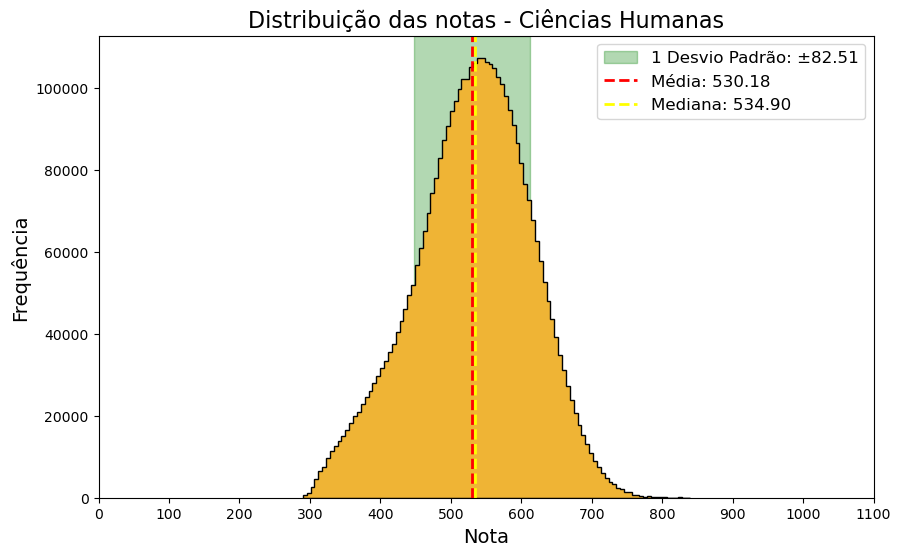

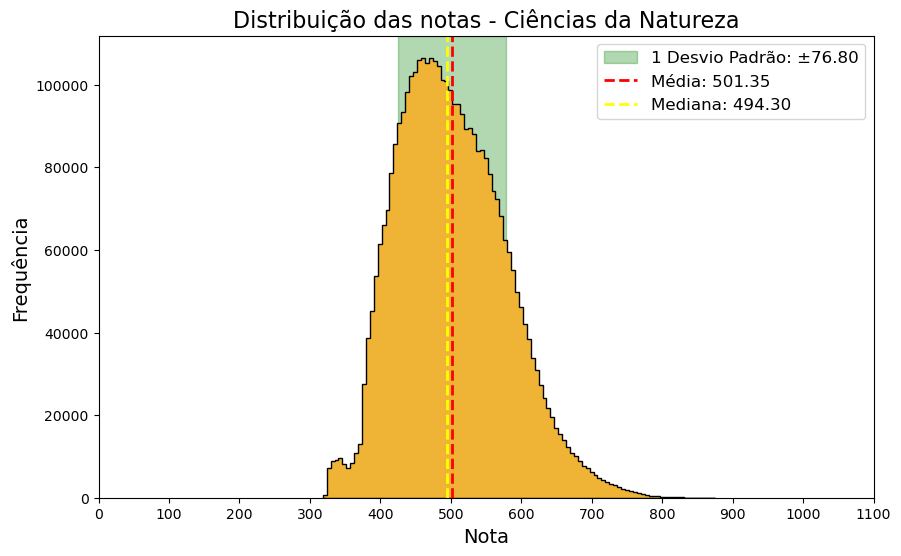

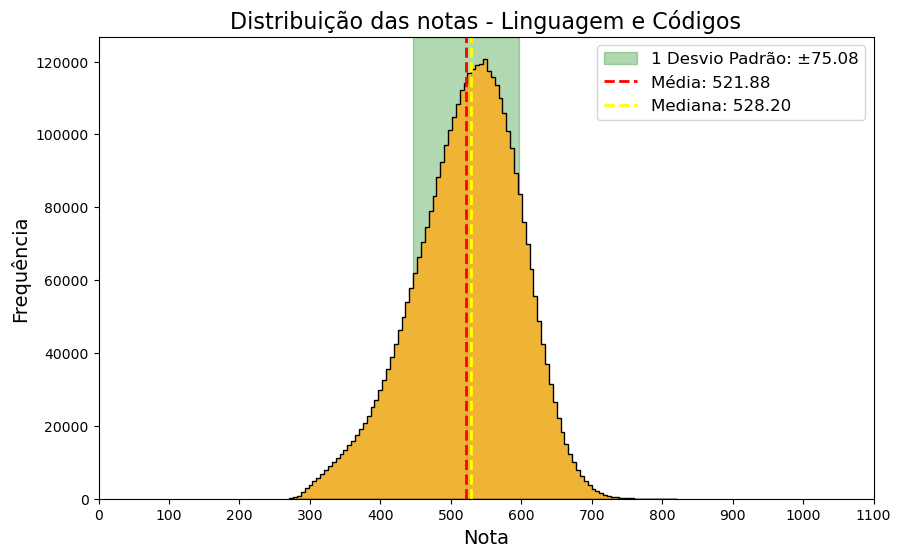

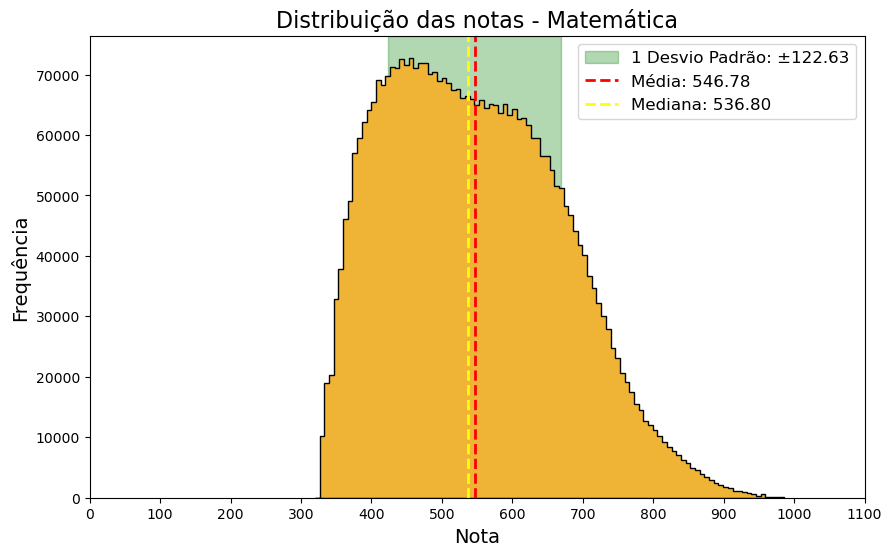

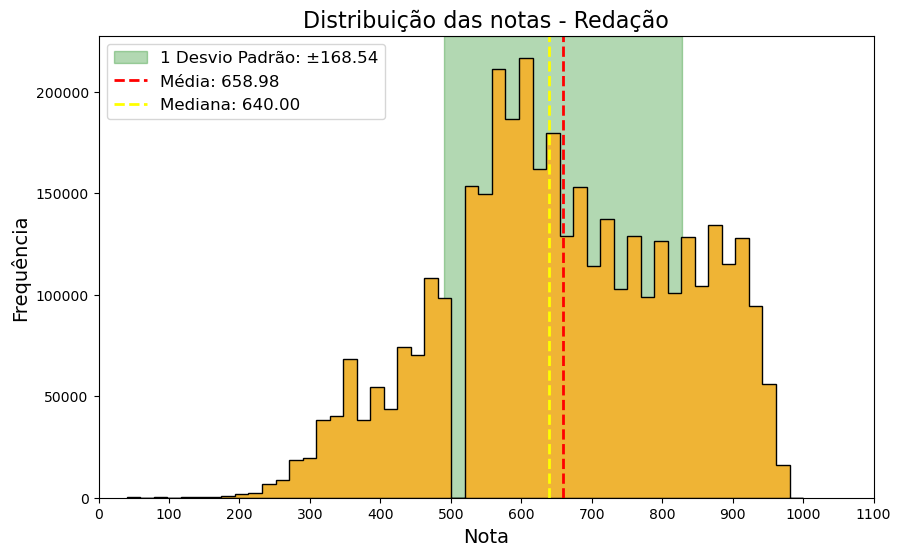

In [34]:
### Distribuição das notas

for nome, df in dc_dfs.items():

    target = dc_target[nome][0]

    if nome == 'Redação':
        bins = 50
    else:
        bins = 100

    media = df[target].mean().item()
    mediana = df[target].median().item()
    desv_pad = df[target].std().item()

    plt.figure(figsize = (10, 6))

    plt.axvspan(
        media - desv_pad,
        media + desv_pad,
        color = 'green',
        alpha = 0.3,
        label = f"1 Desvio Padrão: ±{desv_pad:.2f}"
    )

    plt.hist(
        df[target].to_pandas(),
        bins = bins,
        color = 'xkcd:macaroni and cheese',
        alpha = 1,
        edgecolor = 'black',
        histtype = 'stepfilled'
    )

    plt.axvline(
        x = media,
        color = 'red',
        linestyle = 'dashed',
        linewidth = 2,
        label = f"Média: {media:.2f}"
    )

    plt.axvline(
        x = mediana,
        color = 'yellow',
        linestyle = 'dashed',
        linewidth = 2,
        label = f"Mediana: {mediana:.2f}"
    )

    plt.legend(fontsize = 12)

    plt.title(f"Distribuição das notas - {nome}", fontsize = 16)

    plt.xlabel("Nota", fontsize = 14)
    plt.ylabel("Frequência", fontsize = 14)

    plt.xticks(range(0, 1101, 100))

    plt.xlim(0, 1100)

    plt.show()

del nome, df, bins, target, media, mediana, desv_pad

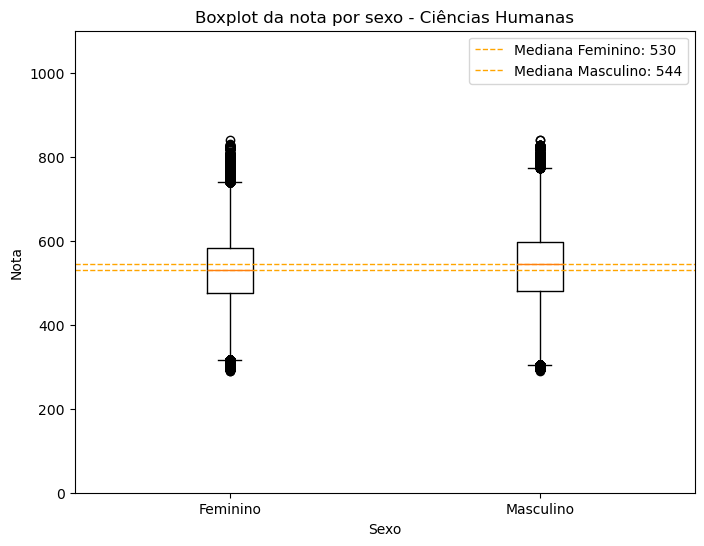

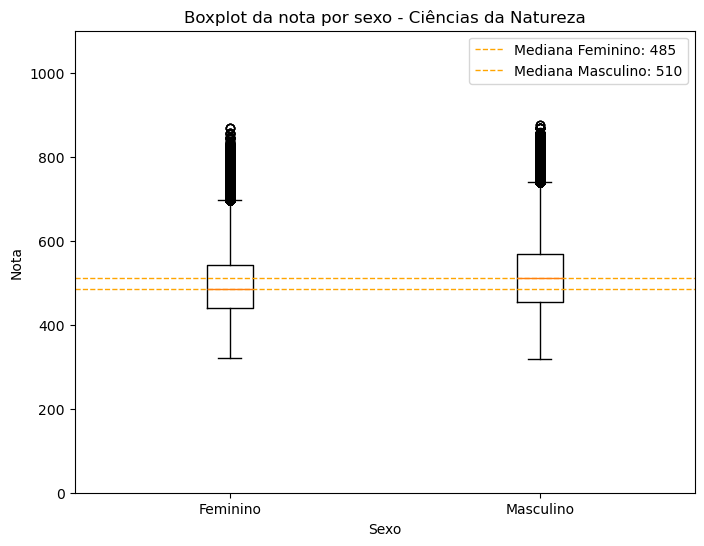

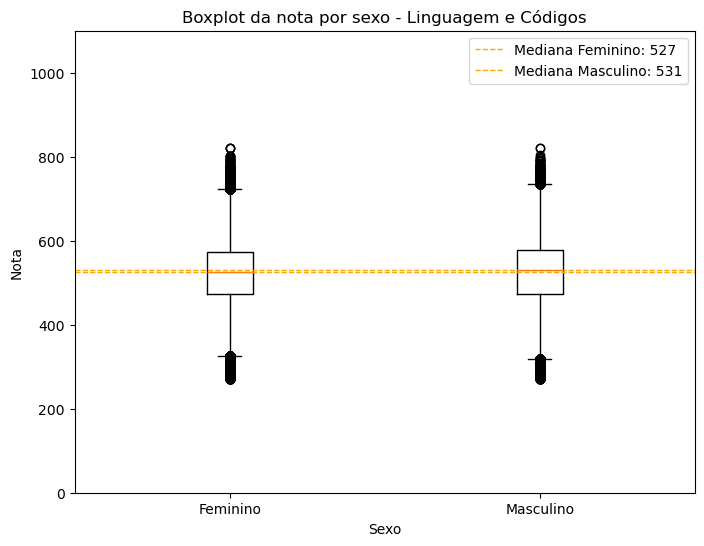

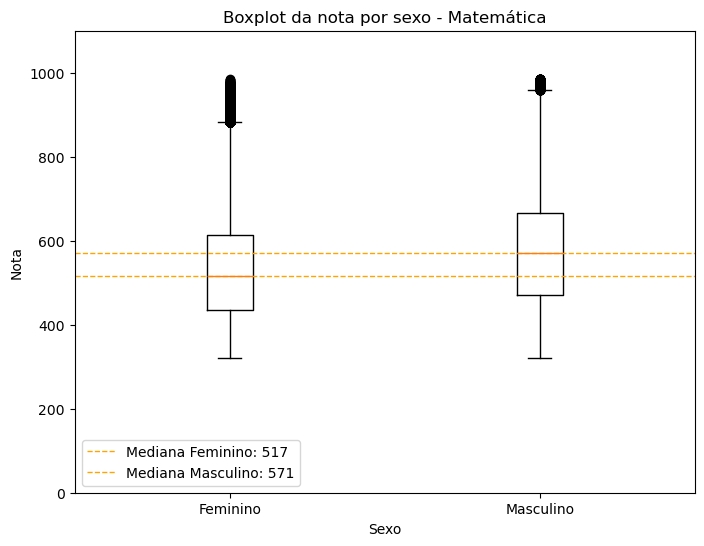

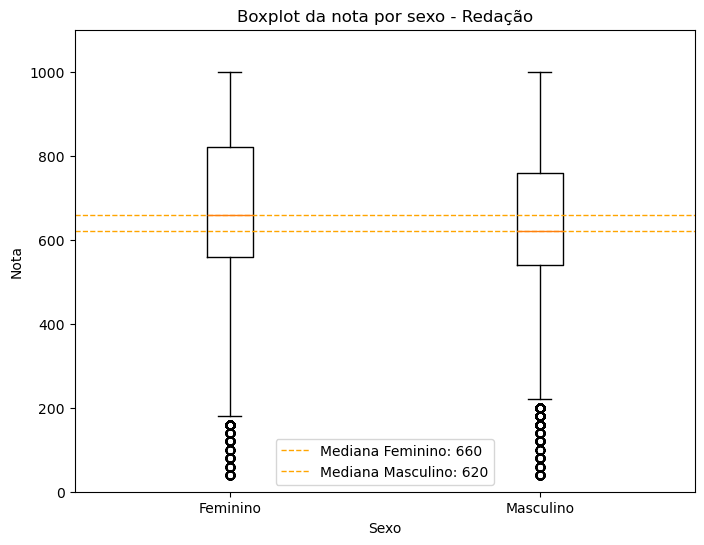

In [35]:
### Boxplot da nota por sexo

for nome, df in dc_dfs.items():

    target = dc_target[nome][0]

    plt.figure(figsize = (8, 6))

    dc_boxplot = plt.boxplot(
        [
            df[df['sexo'] == 'F'][target].to_pandas(),
            df[df['sexo'] == 'M'][target].to_pandas()
        ],
        tick_labels = ['Feminino', 'Masculino']
    )

    mediana_f = dc_boxplot['medians'][0].get_ydata()[0]
    mediana_m = dc_boxplot['medians'][1].get_ydata()[0]

    plt.title(f"Boxplot da nota por sexo - {nome}")

    plt.axhline(
        y = mediana_f,
        color = 'orange',
        linestyle = 'dashed',
        linewidth = 1,
        label = f"Mediana Feminino: {mediana_f:.0f}"
    )

    plt.axhline(
        y = mediana_m,
        color = 'orange',
        linestyle = 'dashed',
        linewidth = 1,
        label = f"Mediana Masculino: {mediana_m:.0f}"
    )

    plt.xlabel("Sexo")
    plt.ylabel("Nota")

    plt.legend()

    plt.ylim(0, 1100)

    plt.show()

    del dc_boxplot, target, mediana_f, mediana_m, df, nome

In [39]:
### Análise de outliers usando o método IQR

for k_iqr in [1.5, 2.0, 2.5, 3.0]:

    print(50 * "=")
    print()

    print(f"Análise de outliers com k = {k_iqr}")

    for nome, df in dc_dfs.items():

        target = dc_target[nome][0]

        q1 = df[target].quantile(0.25).item()
        q3 = df[target].quantile(0.75).item()
        iqr = q3 - q1

        limite_inferior = q1 - k_iqr * iqr
        limite_superior = q3 + k_iqr * iqr

        num_outliers_superiores = df[df[target] > limite_superior].shape[0]
        num_outliers_inferiores = df[df[target] < limite_inferior].shape[0]

        num_outliers = num_outliers_superiores + num_outliers_inferiores

        print(f"{nome}: {num_outliers} outliers ({num_outliers_superiores} superiores e {num_outliers_inferiores} inferiores)")
        print(f"{nome}: {num_outliers / df.shape[0] * 100:.2f}% outliers ({num_outliers_superiores / df.shape[0] * 100:.2f}% superiores e {num_outliers_inferiores / df.shape[0] * 100:.2f}% inferiores)")
        print()

    print(50 * "=")
    print()

del k_iqr, nome, df, target, q1, q3, iqr, limite_inferior, limite_superior, num_outliers_superiores, num_outliers_inferiores, num_outliers


Análise de outliers com k = 1.5
Ciências Humanas: 12267 outliers (3897 superiores e 8370 inferiores)
Ciências Humanas: 0.31% outliers (0.10% superiores e 0.21% inferiores)

Ciências da Natureza: 26815 outliers (26815 superiores e 0 inferiores)
Ciências da Natureza: 0.71% outliers (0.71% superiores e 0.00% inferiores)

Linguagem e Códigos: 32475 outliers (1764 superiores e 30711 inferiores)
Linguagem e Códigos: 0.82% outliers (0.04% superiores e 0.77% inferiores)

Matemática: 4712 outliers (4712 superiores e 0 inferiores)
Matemática: 0.12% outliers (0.12% superiores e 0.00% inferiores)

Redação: 798 outliers (0 superiores e 798 inferiores)
Redação: 0.02% outliers (0.00% superiores e 0.02% inferiores)



Análise de outliers com k = 2.0
Ciências Humanas: 129 outliers (129 superiores e 0 inferiores)
Ciências Humanas: 0.00% outliers (0.00% superiores e 0.00% inferiores)

Ciências da Natureza: 3580 outliers (3580 superiores e 0 inferiores)
Ciências da Natureza: 0.09% outliers (0.09% superio

In [ ]:
# # import phik

# # from phik import resources
# # from phik.binning import bin_data
# from phik.report import plot_correlation_matrix

In [ ]:
# matriz_phik_humanas = df_ciencia_humanas[cols + target].phik_matrix()

In [ ]:
# plot_correlation_matrix(
#     matriz_phik_humanas.values,
#     x_labels = matriz_phik_humanas.columns,
#     y_labels = matriz_phik_humanas.index,
#     vmin = 0,
#     vmax = 1,
#     color_map = 'RdYlGn',
#     title = 'Matriz de Correlação Phik - Ciências Humanas',
#     figsize = (15, 8)
#     )

In [ ]:
# significancia_humanas = df_ciencia_humanas[cols + target].significance_matrix()

In [ ]:
# plot_correlation_matrix(
#     significancia_humanas.fillna(0).values,
#     x_labels = significancia_humanas.columns,
#     y_labels = significancia_humanas.index,
#     vmin = -5,
#     vmax = 5,
#     color_map = 'RdYlGn',
#     title = 'Significância - Ciências Humanas',
#     figsize = (20, 20)
#     )

In [ ]:
# global_humanas, label = df_ciencia_humanas.global_phik()

In [ ]:
# plot_correlation_matrix(
#     global_humanas,
#     x_labels = [''],
#     y_labels = label,
#     vmin = 0,
#     vmax = 1,
#     color_map = 'RdYlGn',
#     title = r'$g_k$  - Ciências Humanas',
#     figsize = (6, 10)
#     )

In [ ]:
# for i in range(len(global_humanas)):
#     print(f"{label[i]} : {global_humanas[i][0]:.4f}")

In [ ]:
# import xgboost as xgb

# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import OneHotEncoder